# Atelier Clustering
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
 
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import cluster, metrics

L'objectif de cette activité est de vous exercer aux différentes techniques du clustering (KMeans, CAH). Votre mission: identifier des groupes de fromages homogènes, partageant des caractéristiques similaires. La donnée proposée regroupe les propriétés nutritives (ex. protéines, lipides, etc. ; 9 variables) de 29 fromages.

## EDA - Exploratory Data Analysis

1) Lire votre fichier 'fromages.txt'

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression


df= pd.read_csv("/content/drive/MyDrive/Copie de fromages.txt", sep = " ")
df

,Fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
2,Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
3,Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
4,Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
5,Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
6,Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
7,Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
8,Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28
9,Comte,399,92.0,220.5,32.4,55.9,1.3,29.2,120,51


In [ ]:
df.isna().sum()

In [ ]:
df.describe()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


2) Vérifier si des valeurs manquantes existent, afficher les premières statistiques descriptives du dataframe

Il n'y a pas de valeurs manquantes

In [ ]:
df.shape

(29, 10)

In [ ]:
df.describe()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


3) Visualiser vos données (scatterplots, pairplots, étude de corrélation). Que remarquez-vous?

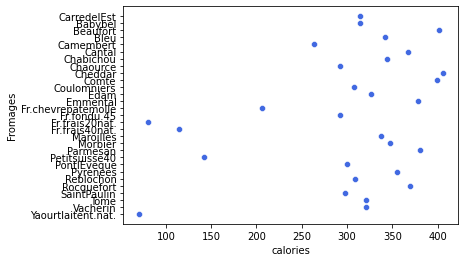

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#scatterplot

sns.scatterplot(data = df,
                x = df['calories'],
                y = df['Fromages'],
                color = 'royalblue')
plt.show()



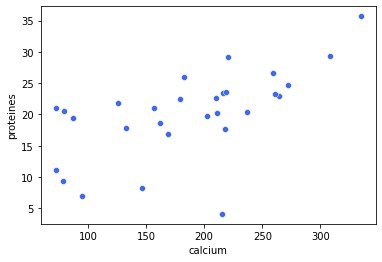

In [ ]:
sns.scatterplot(data = df,
                x = df['calcium'],
                y = df['proteines'],
                color = 'royalblue')
plt.show()



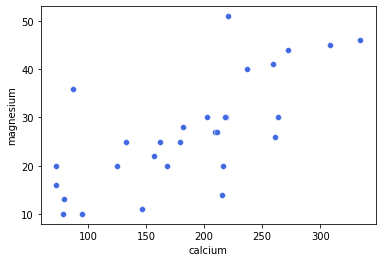

In [ ]:
sns.scatterplot(data = df,
                x = df['calcium'],
                y = df['magnesium'],
                color = 'royalblue')
plt.show()

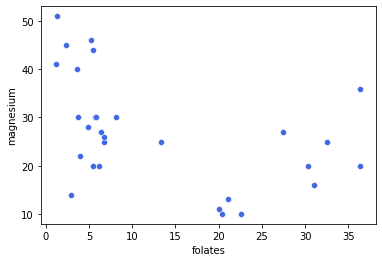

In [ ]:
sns.scatterplot(data = df,
                x = df['folates'],
                y = df['magnesium'],
                color = 'royalblue')
plt.show()

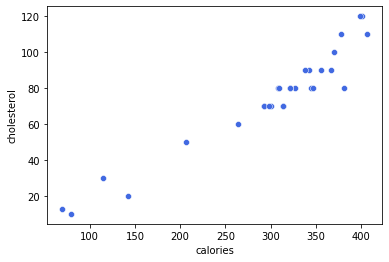

In [ ]:
sns.scatterplot(data = df,
                x = df['calories'],
                y = df['cholesterol'],
                color = 'royalblue')
plt.show()

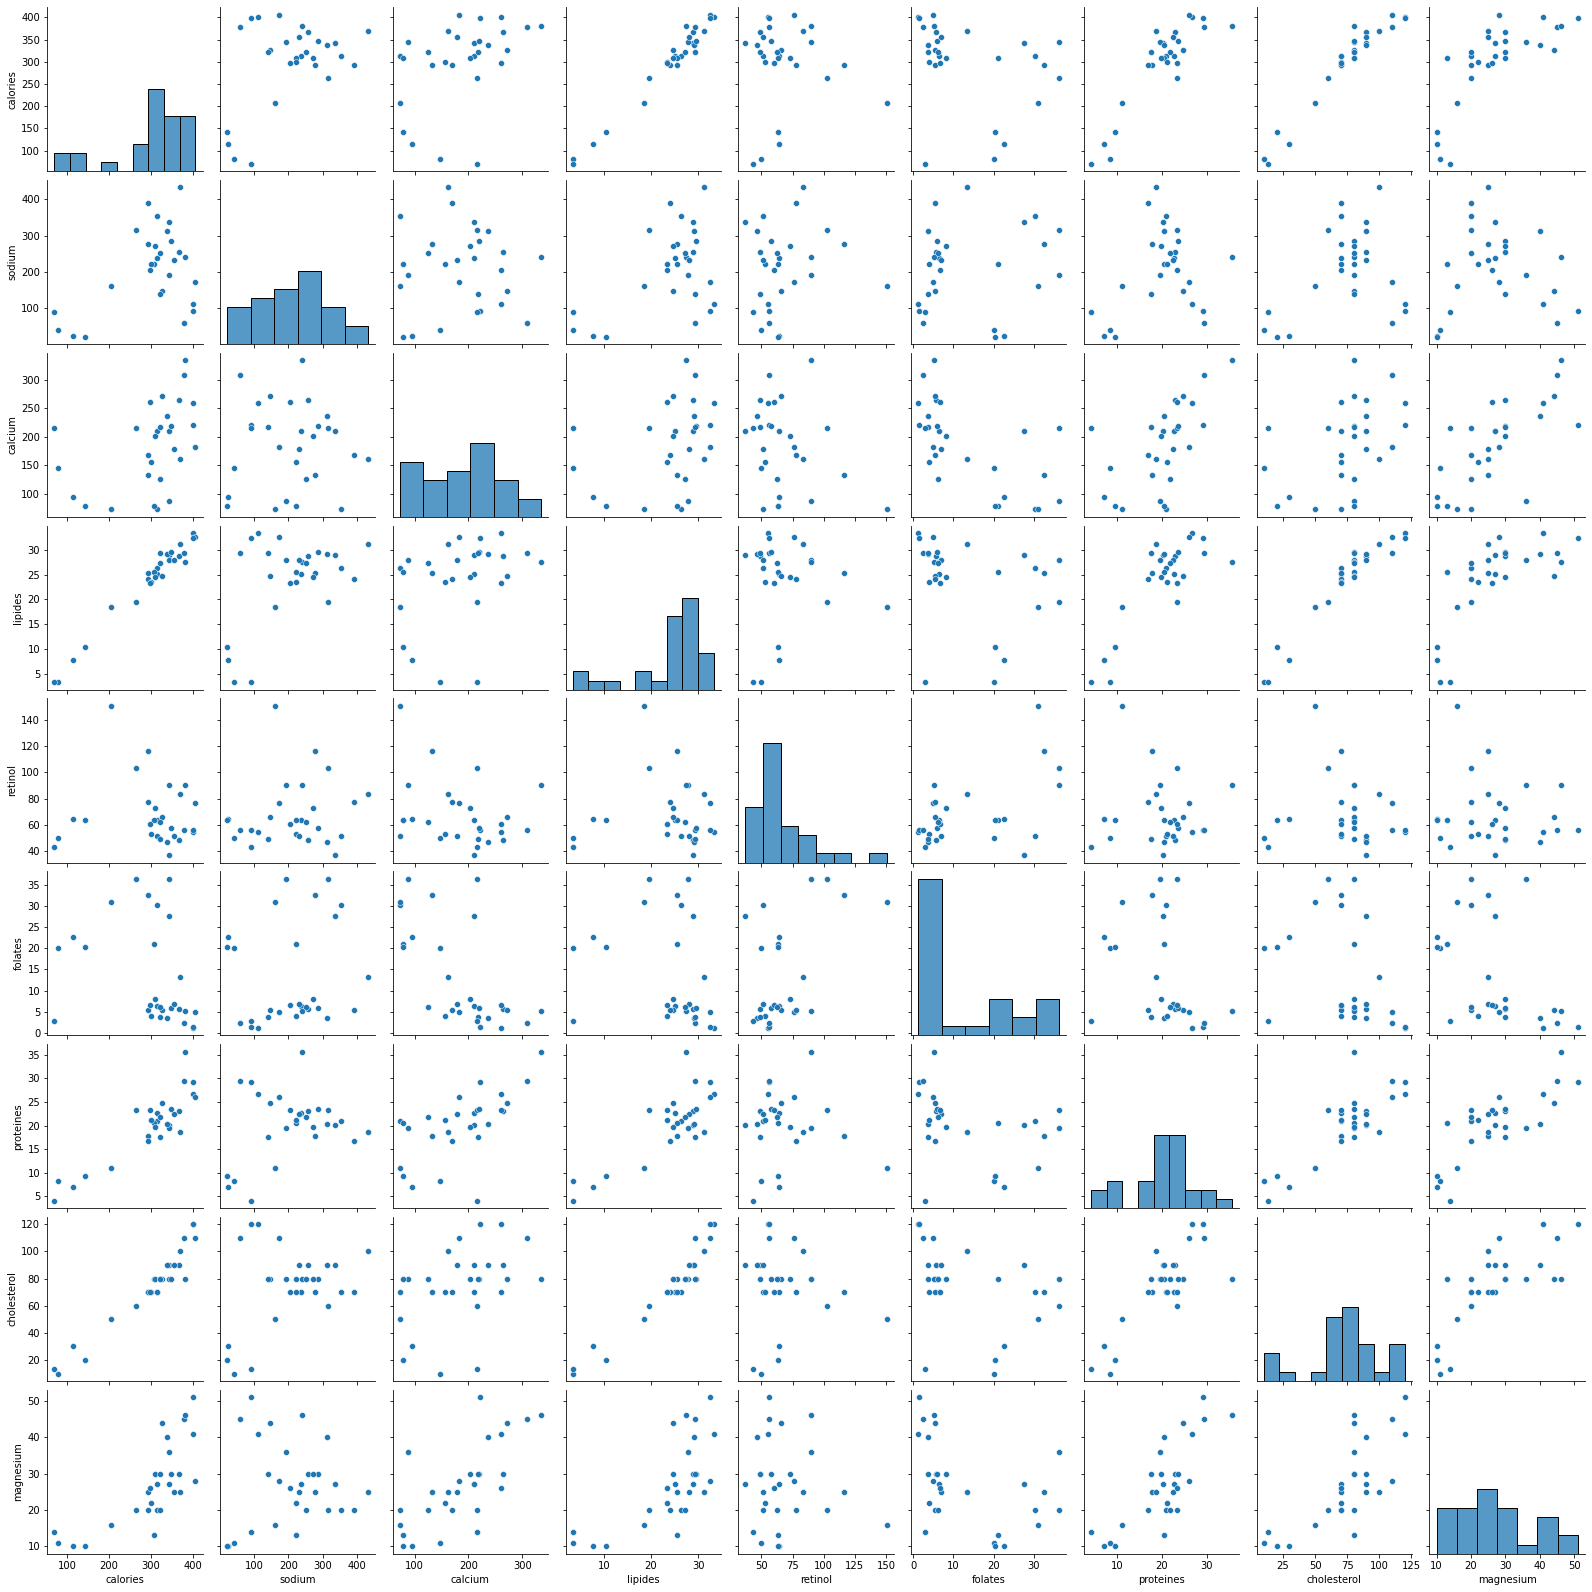

In [ ]:
sns.pairplot(df)
plt.show()

4) Mettre la colonne 'Fromages' en index du dataframe

In [ ]:
df_new = df.set_index('Fromages')
df_new


,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28


In [ ]:
X = df_new.iloc[:,:-1].values

X

array([[314. , 353.5,  72.6,  26.3,  51.6,  30.3,  21. ,  70. ],
       [314. , 238. , 209.8,  25.1,  63.7,   6.4,  22.6,  70. ],
       [401. , 112. , 259.4,  33.3,  54.9,   1.2,  26.6, 120. ],
       [342. , 336. , 211.1,  28.9,  37.1,  27.5,  20.2,  90. ],
       [264. , 314. , 215.9,  19.5, 103. ,  36.4,  23.4,  60. ],
       [367. , 256. , 264. ,  28.8,  48.8,   5.7,  23. ,  90. ],
       [344. , 192. ,  87.2,  27.9,  90.1,  36.3,  19.5,  80. ],
       [292. , 276. , 132.9,  25.4, 116.4,  32.5,  17.8,  70. ],
       [406. , 172. , 182.3,  32.5,  76.4,   4.9,  26. , 110. ],
       [399. ,  92. , 220.5,  32.4,  55.9,   1.3,  29.2, 120. ],
       [308. , 222. ,  79.2,  25.6,  63.6,  21.1,  20.5,  80. ],
       [327. , 148. , 272.2,  24.7,  65.7,   5.5,  24.7,  80. ],
       [378. ,  60. , 308.2,  29.4,  56.3,   2.4,  29.4, 110. ],
       [206. , 160. ,  72.8,  18.5, 150.5,  31. ,  11.1,  50. ],
       [292. , 390. , 168.5,  24. ,  77.4,   5.5,  16.8,  70. ],
       [ 80. ,  41. , 146

## Preprocessing

5) Standardiser les données afin quelles soient toutes à la même échelle <br />
<i>Aide: [How and why to Standardize your data](https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832)</i>

In [ ]:
Z = (X - X.mean(axis=0))/X.std(axis=0)
print(Z)

[[ 1.54629966e-01  1.34296773e+00 -1.58746440e+00  2.68066256e-01
  -6.72289850e-01  1.50091119e+00  1.21518677e-01 -1.65242000e-01]
 [ 1.54629966e-01  2.61392734e-01  3.37679113e-01  1.17845552e-01
  -1.62662483e-01 -5.73842591e-01  3.55479948e-01 -1.65242000e-01]
 [ 1.11791739e+00 -9.18507266e-01  1.03364936e+00  1.14435370e+00
  -5.33300568e-01 -1.02525346e+00  9.40383125e-01  1.63626853e+00]
 [ 4.64653504e-01  1.17909273e+00  3.55920269e-01  5.93544448e-01
  -1.28300033e+00  1.25784380e+00  4.53804189e-03  5.55362210e-01]
 [-3.98983494e-01  9.73078448e-01  4.23272229e-01 -5.83184399e-01
   1.49257351e+00  2.03045086e+00  4.72460583e-01 -5.25544105e-01]
 [ 7.41460234e-01  4.29949877e-01  1.09819499e+00  5.81026056e-01
  -7.90220150e-01 -6.34609438e-01  4.13970266e-01  5.55362210e-01]
 [ 4.86798043e-01 -1.69364409e-01 -1.38260219e+00  4.68360528e-01
   9.49251773e-01  2.02176988e+00 -9.78200141e-02  1.95060105e-01]
 [-8.89599560e-02  6.17235591e-01 -7.41355405e-01  1.55400728e-01
   

In [ ]:
Z.mean(axis = 0)

array([-1.07193947e-16,  7.65671051e-17,  5.55111512e-17,  8.11611315e-16,
       -3.06268421e-17,  1.11022302e-16,  1.07193947e-16, -2.29701315e-16])

In [ ]:
Z.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

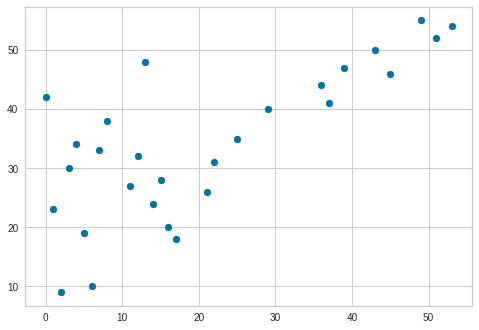

In [ ]:
plt.scatter(Z[:,0],Z[:,1], label='True Position')

## ML Clustering - KMeans

6) Entraîner un premier modèle des 'Kmeans' avec n_clusters = 5 et analyser vos prédictions. Visualiser vos clusters. Cela vous semble-t-il correct? <br />
<i>Aide: [K-Means Clustering with Scikit-Learn
](https://stackabuse.com/k-means-clustering-with-scikit-learn/)</i>

In [ ]:
from sklearn import cluster
res = cluster.KMeans(n_clusters=5)
res.fit(Z)



KMeans(n_clusters=5)

In [ ]:
res.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       4, 4, 4, 4, 2, 1], dtype=int32)

In [ ]:
import numpy as np
np.unique(res.labels_,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([ 7,  1,  1, 15,  4]))

In [ ]:
idk = np.argsort(res.labels_)

In [ ]:
#affichage des observations et leurs groupes
print(pd.DataFrame(df_new.index[idk],res.labels_[idk]))


             Fromages
0         PontlEveque
0       Petitsuisse40
0            Parmesan
0             Morbier
0           Maroilles
0      Fr.frais40nat.
0      Fr.frais20nat.
1            Vacherin
2                Tome
3         Fr.fondu.45
3            Emmental
3         CarredelEst
3         Coulomniers
3               Comte
3             Cheddar
3            Chaource
3           Chabichou
3              Cantal
3           Camembert
3                Bleu
3            Beaufort
3             Babybel
3                Edam
3  Fr.chevrepatemolle
4            Pyrenees
4           Reblochon
4          Rocquefort
4         SaintPaulin


In [ ]:
print(res.transform(Z))

[[117.19744802 793.76597442 540.25141544  33.04851364 232.46388197]
 [113.77135621 789.99195979 536.50078212  29.8082767  228.84940686]
 [114.14370124 790.03143254 536.95000386  30.1390194  229.7072665 ]
 [110.39304399 783.7103268  530.92705563  27.88310777 224.77353047]
 [100.27218647 777.34008478 523.63145456  18.9406909  215.49145985]
 [ 92.92133132 769.24796242 516.05527266  12.9921027  208.59032099]
 [ 90.71596189 767.57769934 514.16694624   6.88978519 206.37764544]
 [ 94.37701053 767.43078826 514.55859608  16.27584186 208.39390084]
 [ 79.25038615 756.62781098 502.85489544  12.854384   194.55130145]
 [ 68.28612729 745.74900306 491.86996873  22.47213542 183.38379511]
 [ 67.29321312 740.68515901 487.75488617  23.03444834 181.3700572 ]
 [ 62.29408342 738.97050165 485.50617019  22.68662732 177.74535258]
 [ 60.64752031 736.93263513 483.67068789  26.35195241 176.18771552]
 [ 57.26389608 732.77627067 479.44166116  28.65958428 172.1128023 ]
 [ 53.70868487 730.48186092 477.07298913  31.590

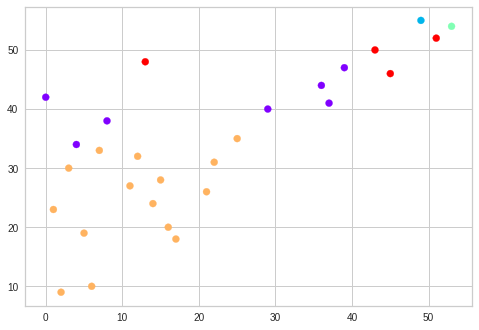

In [ ]:
plt.scatter(Z[:,0], Z[:,1], c=res.labels_, cmap='rainbow')



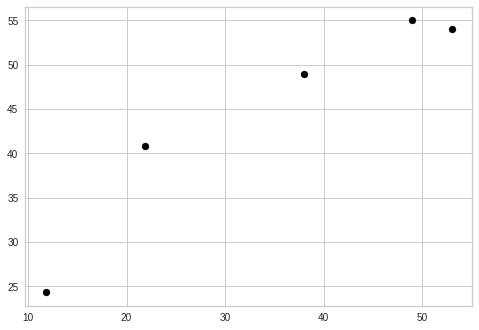

In [ ]:
plt.scatter(res.cluster_centers_[:,0] ,res.cluster_centers_[:,1], color='black')

7) La partie ci-dessous sera dédiée à la découverte du nombre optimal de clusters afin d'améliorer notre modèle. <br /><br />
Méthode 1: Essayer de trouver le nombre optimal de clusters grâce à la <i><b>méthode du coude</b> (Elbow method).</i> <br />
<i>Aide: <br />[Tutorial: How to determine the optimal number of clusters for k-means clustering](https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f)<br /> [Selecting optimal number of clusters in KMeans Algorithm](https://medium.com/@jyotiyadav99111/selecting-optimal-number-of-clusters-in-kmeans-algorithm-silhouette-score-c0d9ebb11308)</i>

In [ ]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Elbow Method')

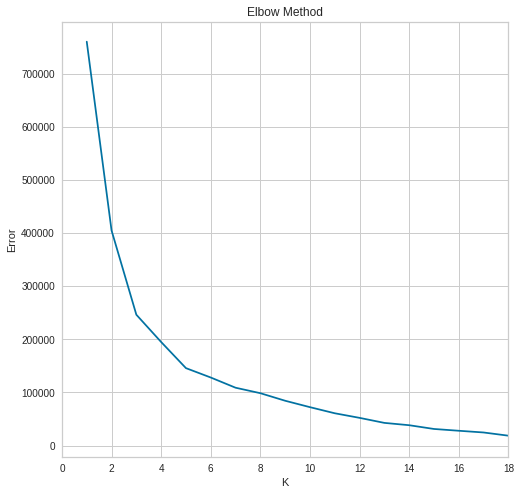

In [ ]:
Ks = np.arange(1, 20)
km = [KMeans(n_clusters=i, random_state=1986) for i in Ks]
score = [-km[i].fit(X).score(X) for i in range(len(km))]
Ks.dtype = int


plt.figure(figsize=(8,8))
plt.plot(Ks,score)
plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Elbow Method')

Méthode 2: Essayer de trouver le nombre optimal de clusters grâce au <i><b> coefficent de silhouette</b> (Silhouette score)</i> <br />
<i>Aide: ['graphique de Silhouette' du cours](https://docs.google.com/presentation/d/1wS89cAEbrF2KHC72oVi7s--DY5q_hcld/edit#slide=id.p27)</i>

[0.50730425 0.37344429 0.32996212 0.35889565 0.3056564  0.2863881
 0.29771962 0.28094536 0.2681495 ]


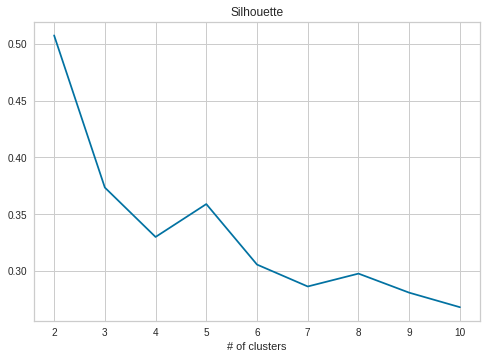

In [ ]:
#librairie pour évaluation des partitions
from sklearn import metrics
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
   km = cluster.KMeans(n_clusters=k+2)
   km.fit(X)
   res[k] = metrics.silhouette_score(X,km.labels_)
print(res)
#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()


Entrainer de nouveau le modèle de Kmeans avec le nombre optimal de clusters que vous aurez découvert. Analyser de nouveau vos prédictions (clusters). Cela vous pourrait-il mieux?

In [ ]:
res = cluster.KMeans(n_clusters=3)
res.fit(Z)

KMeans(n_clusters=3)

Pourquoi ne pas essayer une PCA ?

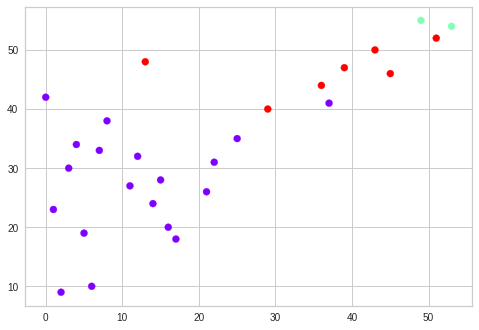

In [ ]:
plt.scatter(Z[:,0], Z[:,1], c=res.labels_, cmap='rainbow')

## <i>Partie optionnelle</i>: 

Entrainer un modèle de Classification Ascendante Hiérarchique (Agglomerative Clustering), visualiser le dendrogramme, en déduire le nombre optimal de clusters de votre modélisation. <br />
[Première partie du cours](https://docs.google.com/presentation/d/1wS89cAEbrF2KHC72oVi7s--DY5q_hcld/edit#slide=id.p1)

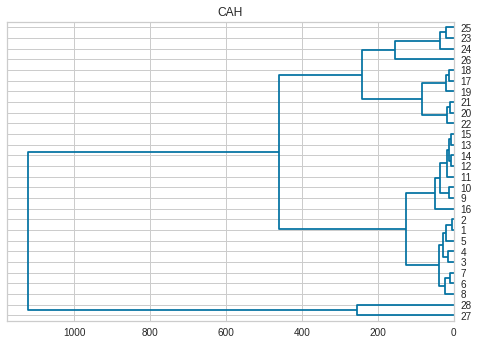

In [ ]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
#générer la matrice des liens
XXX = linkage(Z,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(XXX,labels=df.index,orientation='left',color_threshold=0)
plt.show()


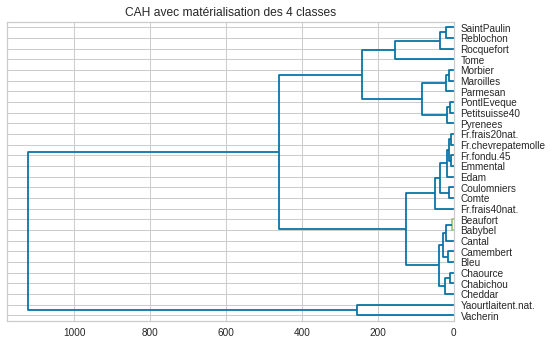

[ 8  8  6  7  9  3  4  5 10 11 16 12 14 13 15 17 21 22 23 18 19 20 24 26
 25 27  1  2]
              Fromages
1                 Tome
2             Vacherin
3               Cantal
4            Chabichou
5             Chaource
6             Beaufort
7                 Bleu
8          CarredelEst
8              Babybel
9            Camembert
10             Cheddar
11               Comte
12                Edam
13  Fr.chevrepatemolle
14            Emmental
15         Fr.fondu.45
16         Coulomniers
17      Fr.frais20nat.
18            Parmesan
19       Petitsuisse40
20         PontlEveque
21      Fr.frais40nat.
22           Maroilles
23             Morbier
24            Pyrenees
25          Rocquefort
26           Reblochon
27         SaintPaulin


In [ ]:
#matérialisation des 4 classes (hauteur t = 7)
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(XXX,labels=df_new.index,orientation='left',color_threshold=7)
plt.show()
#découpage à la hauteur t = 7 ==> identifiants de 4 groupes obtenus
groupes_cah = fcluster(XXX,t=7,criterion='distance')
print(groupes_cah)
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pd.DataFrame(df_new.index[idg],groupes_cah[idg]))
